Import libraries , Install packages

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_selection import f_regression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
import numpy as npz
import os
import seaborn as sns
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# from catboost import CatBoostRegressor
# !pip install lightgbm
#from lightgbm import LGBMRegressor
# !pip install xgboost

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
%matplotlib inline

#%matplotlib inlinepd.set_option('float_format', '{:f}'.format)

Input

In [ ]:
df_input = pd.read_csv(r'sample_data/train.csv')
df_input.head()



,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [ ]:
#TEST
test_input = pd.read_csv('sample_data/test.csv')
X=test_input['Property_ID']
test_input.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [ ]:
# # processing property_type 
df_input = df_input[~df_input['Property_Type'].isin(["#R%$G&867"])]
df_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(df_input['Property_Type'])
df_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

df_input.head()
# df_input.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x21e3,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98,1,0,0,0,0
1,0x68d4,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20,1,0,0,0,0
2,0x7d81,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39,1,0,0,0,0
3,0x7a57,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46,1,0,0,0,0
4,0x9409,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70,0,1,0,0,0


In [ ]:
# Test processing
# #  property_type 
test_input = test_input[~test_input['Property_Type'].isin(["#R%$G&867"])]
test_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(test_input['Property_Type'])
test_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

test_input.head()
# df_input.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x6e93,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52,1,0,0,0,0
1,0x8787,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16,1,0,0,0,0
2,0x6c17,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92,0,0,1,0,0
3,0x9dbd,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45,1,0,0,0,0
4,0xbfde,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72,0,1,0,0,0


In [ ]:
# Proprty Area  
    # No need to clean 

In [ ]:
# Number_of_Windows 
df_input = df_input[~df_input['Number_of_Windows'].isna()]
# df_input.info()

# Test processing
test_input = test_input[~test_input['Number_of_Windows'].isna()]


In [ ]:
# Number_of_Doors 
    # No need to clean it 
# df_input['Number_of_Doors']
# df_input.info()


In [ ]:
# Power_Backup 
df_input = df_input[~df_input['Power_Backup'].isin(['NOT MENTIONED'])]
df_input[['Power_Backup_1','Power_Backup_2']] = pd.get_dummies(df_input['Power_Backup'])  
df_input.drop('Power_Backup',axis=1,inplace=True)
#df_input.columns
# df_input.info()
# df_input.shape 

#Test processing
test_input = test_input[~test_input['Power_Backup'].isin(['NOT MENTIONED'])]
test_input[['Power_Backup_1','Power_Backup_2']] = pd.get_dummies(test_input['Power_Backup'])  
test_input.drop('Power_Backup',axis=1,inplace=True)

In [ ]:
# Frequency of power cuts 
df_input = df_input[~df_input['Frequency_of_Powercuts'].isna()]
# df_input['Frequency_of_Powercuts'].value_counts ()

#Test processing
test_input = test_input[~test_input['Frequency_of_Powercuts'].isna()]

In [ ]:
# Water supply  
df_input = df_input[~df_input['Water_Supply'].isin(['NOT MENTIONED'])]
#df_input['Water_Supply'].unique()
df_input[['Water_Supply-Once in a day - Evening','Water_Supply-Once in a day - Morning','Water_Supply-All time','Water_Supply-Once in two days']] = pd.get_dummies(df_input['Water_Supply'])
df_input.drop('Water_Supply',axis=1,inplace=True)
# df_input.info()

#Test processing

test_input = test_input[~test_input['Water_Supply'].isin(['NOT MENTIONED'])]
test_input[['Water_Supply-Once in a day - Evening','Water_Supply-Once in a day - Morning','Water_Supply-All time','Water_Supply-Once in two days']] = pd.get_dummies(test_input['Water_Supply'])
test_input.drop('Water_Supply',axis=1,inplace=True)


In [ ]:
# Crime_Rate 
df_input = df_input[~df_input['Crime_Rate'].isna()]
df_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average', 'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(df_input['Crime_Rate'])
df_input.drop('Crime_Rate',axis=1,inplace=True)
# df_input['Crime_Rate'].unique()
#df_input.head()

#Test processing

test_input = test_input[~test_input['Crime_Rate'].isna()]
test_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average', 'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(test_input['Crime_Rate'])
test_input.drop('Crime_Rate',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


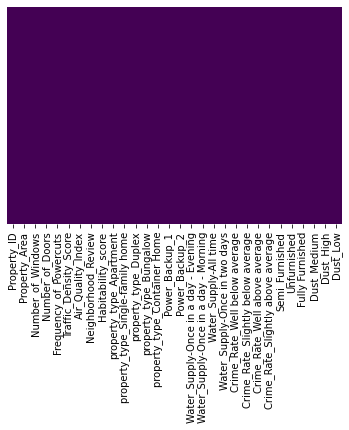

In [ ]:
sns.heatmap(df_input.isnull(),yticklabels=False,cbar=False,cmap='viridis')

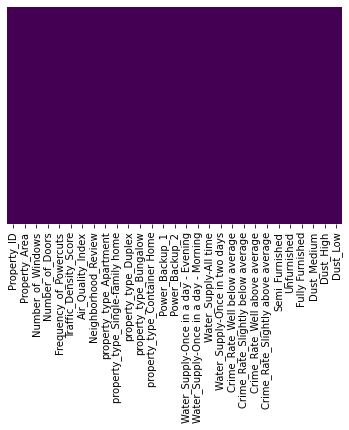

In [ ]:
sns.heatmap(test_input.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#df_input['Dust_and_Noise'].value_counts()
#df_input.info()

In [ ]:
# Furnishing 
df_input = df_input[~df_input['Furnishing'].isin(['NA'])]
df_input = df_input[~df_input['Furnishing'].isna()]
df_input[['Semi_Furnished','Unfurnished','Fully Furnished']] = pd.get_dummies(df_input['Furnishing'])
df_input.drop('Furnishing',axis=1,inplace=True)
# df_input.info()

#Test processing

test_input = test_input[~test_input['Furnishing'].isin(['NA'])]
test_input = test_input[~test_input['Furnishing'].isna()]
test_input[['Semi_Furnished','Unfurnished','Fully Furnished']] = pd.get_dummies(test_input['Furnishing'])
test_input.drop('Furnishing',axis=1,inplace=True)

# New Section

In [ ]:
# Dust_and_Noise 
df_input = df_input[~df_input['Dust_and_Noise'].isna()]
df_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(df_input['Dust_and_Noise'])
df_input.drop('Dust_and_Noise',axis=1,inplace=True)

#Test processing

test_input = test_input[~test_input['Dust_and_Noise'].isna()]
test_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(test_input['Dust_and_Noise'])
test_input.drop('Dust_and_Noise',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_input_cleaned = df_input.copy(deep=True)
df_input_cleaned.drop('Property_ID',axis=1,inplace=True)
df_input_cleaned.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,property_type_Apartment,property_type_Single-family home,...,Crime_Rate_Well below average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Slightly above average,Semi_Furnished,Unfurnished,Fully Furnished,Dust_Medium,Dust_High,Dust_Low
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,1,0,...,0,0,0,1,0,0,1,0,0,1
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,1,0,...,0,1,0,0,1,0,0,0,0,1
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,1,0,...,0,0,1,0,0,0,1,0,0,1
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0,1,...,0,0,0,1,1,0,0,0,0,1
5,1185,3.0,3,0.0,5.69,91.0,4.49,82.94,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
#TEST

test_cleaned = test_input.copy(deep=True)
test_cleaned.drop('Property_ID',axis=1,inplace=True)
test_cleaned.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,...,Crime_Rate_Well below average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Slightly above average,Semi_Furnished,Unfurnished,Fully Furnished,Dust_Medium,Dust_High,Dust_Low
0,293,3.0,1,0.0,7.28,152.0,2.52,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,586,4.0,1,0.0,7.63,92.0,4.16,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,305,1.0,2,1.0,5.39,90.0,2.92,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,258,2.0,1,1.0,7.53,158.0,3.45,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,3031,12.0,4,0.0,8.79,186.0,2.72,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
    
    cor = df_input_cleaned.corr()
    # using pearson correlation
    # plt.figure(figsize=(100,100))
    # Corr_df.drop('Month',inplace=True,axis=1)
    # cor = df.corr()
    # print(cor)
    # sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
    # plt.show()
    # cor.to_excel(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\outputs\Correlations of features.xlsx')

Best Model and tuned

In [ ]:
from copy import deepcopy


def training(X_train,X_test,y_train,y_test):

    ######### 1. Random Forest  ############
    rf = RandomForestRegressor(n_estimators=500)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_r2score = r2_score(y_test,rf_pred)
    print("RF R2 " ,rf_r2score)
    output_rf  = y_test.copy(deep=True)
    output_rf['RF'] = rf_pred

    ######## 2. XGBoost ######################
    xg = XGBRegressor(n_estimators=500)
    xg.fit(X_train,y_train)
    XG_pred = xg.predict(X_test)
    xg_r2score = r2_score(y_test,XG_pred)
    print("XG R2 ",xg_r2score)
    output_xg  = y_test.copy(deep=True)
    output_xg['XGB'] = XG_pred

    return output_rf, output_xg

In [ ]:
rf,xg = trainingbestfit(X_train,X_test,y_train,y_test)

NameError: ignored

Model Building Best Fit

In [ ]:
from copy import deepcopy


def trainingbestfit(X_train,X_test,y_train,y_test):

    ######### 1. Random Forest  ############
    rf = RandomForestRegressor(n_estimators=500)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_r2score = r2_score(y_test,rf_pred)
    print("RF R2 " ,rf_r2score)
    output_rf  = y_test.copy(deep=True)
    output_rf['RF'] = rf_pred

    ######## 2. XGBoost ######################
    xg = XGBRegressor(n_estimators=500)
    xg.fit(X_train,y_train)
    XG_pred = xg.predict(X_test)
    xg_r2score = r2_score(y_test,XG_pred)
    print("XG R2 ",xg_r2score)
    output_xg  = y_test.copy(deep=True)
    output_xg['XGB'] = XG_pred

    return output_rf, output_xg

Training the models


In [ ]:
df_input_cleaned.head()
X_train, X_test, y_train, y_test = train_test_split(df_input_cleaned.drop('Habitability_score',axis=1),df_input_cleaned['Habitability_score'],test_size=0.15)

In [ ]:
rf,xg = trainingbestfit(X_train,X_test,y_train,y_test)

RF R2  0.8423814323008856
[14:52:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG R2  0.7785632563825653


Test Best model

In [ ]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)
#rf_pred = rf.predict(X_test)

RandomForestRegressor(n_estimators=500)

In [ ]:
# rf_r2score = r2_score(y_test,rf_pred)
# print("RF R2 " ,rf_r2score)

In [ ]:
# prediction
rf_pred = rf.predict(test_cleaned)

OUTPUT

In [ ]:
#output submission

dict = {'Property_ID': test_input['Property_ID'],'Habitability_score': rf_pred} 
     
de = pd.DataFrame(dict)
de.to_csv('submission.csv',index=False)